<h1 style="color:Black;" align="center">No Show Appointments</h1> 

Project two will be focused on a dataset, from Kaggle, called ***No-Show Appointments***.  This dataset collects information from 100k medical appointments in Brazil and is **focused on** the question of whether or not patients **show up for their appointment**. A number of characteristics about the patients are included. The dataset includes the following features about the patients:

#### **Data Dictionary**
1. PatientId: Identification of patient 
2. AppointmentID: Identification of each appointment 
3. Gender: Male or Female 
4. ScheduledDay: The day that was scheduled to visit doctors
5. AppointmentDay: The date the appointment was scheduled (ScheduledDay)
6. Age: Age of patient that will be visiting the doctor 
7. Neighbourhood: Appointment location 
8. Scholarship: True/False Bolsa Familia is a social welfare program of the government of Brazil.This program provides financial aid to poor Brazilian families. Note: families can be dropped from program and funds suspended if families with kids exceed the total of permitted school absences. 
9. Hipertension: Hypertension is abnormally high blood pressure
10. Diabetes
11. Alcoholism
12. Handcap
13. SMS_received: 1 ore more messages sent to the patient 
14. No-show - **Yes** means they **DID show up** and **NO** means they did not show up. 
Note: 0 = False and 1 = True

At the end of the data analysis process the `main objective` is to determine if the data can be used for `predicting` if patients will attend the meeting or not.

# Initial Thoughts and Questions 

Prior to the data wrangling and exploration process these are some initial thoughts/questions about the data's features and samples.  Through the process additional questions might be asked, questions modified, etc. 

1. Part of data cleansing process clean up column names
2. What is the mean number of appointments per patient_id? Do more or less appointments relate to missed appointments? 
3. What percentage of first time appointments are missed? 
4. What features have a strong correlation with no-show and show patients. 
5. Does breaking the dataset into two dataframes (show and no_show) provided better insight to features that will help predict if patients will be a show or no show?
6. SMS messages, what is the mean?
7. Neighborhood: Would it be possible to rank into low, middle and high income area?
8. Does calculating the number of days between day the appointment was scheduled and actual appointment date provide insight into show or no show?  
9. Is there a relationship between appointment location and scholarship? Initial assumption is the more people on scholarship for a particular location indicates low to mid income area. 



## Analysis Overview 
1. [**Data Import, Review and Cleaning**](#import)
  * [Initial Cleaning](#clean)
  * [Initial Review of the Feature Age](#r_age)
  * [Initial Review Select Features](#feat)
  * [Convert Categorical Data](#conv)
  
  
2. [**Data Exploration & Feature Engineering**](#featrues)
  * [Percentage of Appointments Made & Missed](#made_missed)
  * [Age Analysis & Feature Engineering](#age)
  * [Municipalities of Brazil](#mun)
  * [SMS Messages Sent](#sms)
  * [Number of Appointments Scheduled by Patient ID](#appt_sch)
  * [Number of Appointments Scheduled by Grouping](#appt_sch_grp)
  * [Analysis of Appointment Scheduled by Grouping](#appt_sch_anal)
  * [Percentage of Appointments Attended/Made](#appt_made)
  * [Analysis Percentage of Appointments Attended/Made](#analysis_appt_made)
  * [Additional Analysis Appointments Scheduled Grouping](#add_ana_sched)
  * [Gender Analysis](#gender)
  * [Days Between Appointment Scheduled & Actual Appointment Day](#days)
  * [Create New Feature Days Between](#days_between)
  * [Analysis Days between Scheduling & Actual Appointment](#analysis_days_between)
  * [Concentrated Focus of Appointments Attended](#con_foc)
  
  
 3. [**Conclusion & Recommendation**](#con_rec)
  * [Data Correlation](#data_corr)
  * [Final Recommendation](#final)


<a id="--"></a>

<a id="import"></a>
<div class="alert alert-block alert-info">
    <font size="+3"><b>Data Import, Review and Cleaning</b></font>
</div>

In [146]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [147]:
# Enter name of dataframe to right of equal sign to run quick analysis 
# Saves time if you have multiple dataframes to review and clean
df_names = df 

In [148]:
# Code to run quick analysis of dataframe
df_names.head()
print('='*75)
df_names.tail()
print('='*75)
print(f"The SHAPE of this dataframe is: {df_names.shape}")
print('='*75)
print("List the types for this dataframe")
df_names.dtypes
print('='*75)
print("List any missing, null or NaN values by column")
df_names.isnull().sum()
print('='*75)
print(f"What is the total number of duplicated rows {df_names.duplicated().sum()}")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


The SHAPE of this dataframe is: (110527, 14)
List the types for this dataframe


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

List any missing, null or NaN values by column


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

What is the total number of duplicated rows 0


<a id="clean"></a>
## Initial Cleaning Required


### **A. Rename feature headings**


### **B. Convert three features data types**

1. PatientId         float64 to `int64`
2. ScheduledDay       object to `dateTime`
3. AppointmentDay     object to `dateTime`

### A. Rename Feature Headings 

In [149]:
old_col_names = list(df.columns)
new_col_names = ['patient_id','appt_id','gender','appt_day','appt_made','age',
                 'appt_location','financial_aid','hypertension','diabetes','alcoholism',
                 'handicap','sms_sent','made_appt']
df.rename(columns={i:j for i,j in zip(old_col_names,new_col_names)},
           inplace=True)
df.head(0) # Check changes 

,patient_id,appt_id,gender,appt_day,appt_made,age,appt_location,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,made_appt


### **B. Convert Data Types 3 Features**

In [150]:
df['patient_id'] = df['patient_id'].astype('int64')
df['appt_day'] = pd.to_datetime(df['appt_day'],yearfirst=True)
df['appt_made'] = pd.to_datetime(df['appt_made'],yearfirst=True)

In [151]:
df['patient_id'].dtypes
df['appt_day'].dtypes
df['appt_made'].dtypes

dtype('int64')

datetime64[ns, UTC]

datetime64[ns, UTC]

In [152]:
df.head()

,patient_id,appt_id,gender,appt_day,appt_made,age,appt_location,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,made_appt
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [153]:
# Validate changes are correct
count_y = 0
count_n = 0
for i in range(len(df['made_appt'])):
    var = df.loc[i,'made_appt']
    if  var == 'Yes':
        count_y += 1
    else:
        count_n += 1
print(f"Yes = {count_y} <><> No = {count_n} Total = {count_n + count_y} ")
print(f"Confirm this number mathces total above {len(df['made_appt'])}")

Yes = 22319 <><> No = 88208 Total = 110527 
Confirm this number mathces total above 110527


## Check Total Unique Values by Column & Summary Statistics 
1. **Patient_id** has 622,999 unique IDs. Run analysis to see how many patients visited more than one time and what the range is for visits.  
2. **Age** 104 unique values with a minimum of -1 which must be an error and max of 115. Double check the count and maybe drop the outliers.  The standard deviation is 23 which does not seem correct. This needs to be validated. 
3. Based on the mean for hypertension, diabetes, alcoholism and handicap it might make sense to drop these columns if the percent is small enough. 

In [154]:
print('Number of UNIQUE VALUES by column')
df.nunique()
df.describe()

Number of UNIQUE VALUES by column


patient_id        62299
appt_id          110527
gender                2
appt_day         103549
appt_made            27
age                 104
appt_location        81
financial_aid         2
hypertension          2
diabetes              2
alcoholism            2
handicap              5
sms_sent              2
made_appt             2
dtype: int64

,patient_id,appt_id,age,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###  Modify Age of one row
- One age is -1 adjust to 1

In [155]:
# Change age from -1 to 1
df[df['age'] == -1]
df.loc[99832,'age'] = df.loc[99832,'age'] = 1
# Confirm age was adjusted 
df['age'].min()

,patient_id,appt_id,gender,appt_day,appt_made,age,appt_location,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,made_appt
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


0

<a id="r_age"></a>
## Initial Age Review 
Based on the below histogram the age range `0 to 10` is the largest bin with respect to appointments made. Then ages `10 to 70` is relatively uniform with a frequency of 12,500 to 15,200. After that, it drops down substantially.  The next steps will be to add a column with the below age ranges.  Then check the correlation between age and whether the individual made the scheduled appointment.  

1. < 10
2. 10 >= and  <20
3. 20 >= and < 30
4. 30 >= and < 40
5. 40 >= and < 50
6. 50 >= and < 60
7. `> 60

In [156]:
# calculate +/- std dev
m = df['age'].mean()
s = np.std(np.array(df['age']))
std_plus_1 = m + s 
std_plus_2 = m + s + s 
std_plus_3 = m + s + s + s 

std_minus_1 = m - s
std_minus_2 = m - s -s 
std_minus_3 = m - s - s - s

In [157]:
InteractiveShell.ast_node_interactivity = "none" # "last_expr" "all" "none"

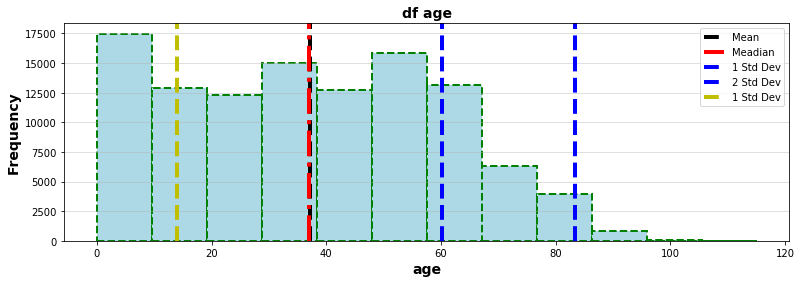

In [158]:
# Age histogram 
fig, ax = plt.subplots(figsize=(13,4))
col_name = 'age'
df_name = 'df'
bins = 12

plt.hist(df[col_name],facecolor=(.68, .85, .90),edgecolor='green',
        linewidth=2,linestyle='--',bins=bins,align='mid')

ax.set_title(df_name + ' ' + col_name,fontsize=14,fontweight='bold')
ax.set_ylabel('Frequency',fontsize=14,fontweight='bold')
ax.set_xlabel(col_name,fontsize=14,fontweight='bold')

plt.axvline(df[col_name].mean(),color='k',linestyle='--',lw=4,label='Mean') # Mean
plt.axvline(df[col_name].median(),color='r',linestyle='-.',lw=4,label='Meadian') # Meadian 
plt.axvline(std_plus_1,color='b',linestyle='--',lw=4,label='1 Std Dev') # 1 std dev
plt.axvline(std_plus_2,color='b',linestyle='--',lw=4,label='2 Std Dev') # 2 std dev
plt.axvline(std_minus_1,color='y',linestyle='--',lw=4,label='1 Std Dev') # 1 std dev left
plt.grid(axis='y',alpha=0.5)
plt.legend()
plt.show()

<a id="feat"></a>
## Review of Financial Aid, Hypertension, Diabetes, Alcoholism, Handicap
Early review of the features to understand what percentage of the patients are linked to a particular feature. The two main features are: `Financial Aid` where `10%` of patients receive and `20%` of patients have `Hypertension`.

1. **Financial Aid** 10%
2. **Hypertension**  20% 
3. **Diabetes**       7% 
4. **Alcoholism**     3%
5. **Handicap**       2%

In [159]:
# Percent True where True indicates they reveived financial aid have diabetes, etc
col_names = ['financial_aid', 'hypertension', 'diabetes','alcoholism', 'handicap']
for col in col_names:
    count_0 = 0
    count_1 = 0
    for i in range(len(df[col])):
        if df.loc[i,col] == 0:
            count_0 += 1
        else:
            count_1 += 1
    percent = int(round(count_1 / (count_0 + count_1),2) * 100)
    print(f"{col.title()} has a total of {count_1} rows equal to True which is {percent} percent of total")

Financial_Aid has a total of 10861 rows equal to True which is 10 percent of total
Hypertension has a total of 21801 rows equal to True which is 20 percent of total
Diabetes has a total of 7943 rows equal to True which is 7 percent of total
Alcoholism has a total of 3360 rows equal to True which is 3 percent of total
Handicap has a total of 2241 rows equal to True which is 2 percent of total


<a id="conv"></a>
## Convert Categorical Data Types 
**made_appt** is currently a string object where 'No' equals the patient did not make the appointment and 'Yes' equals the patient did make the appointment.  This will be switched to int64 where 'Yes' will be converted to 1 (True) they made appointment and 'No' to 0 (False) they did NOT make the appointment.   

**gender** is a string object where 'M' is male and 'F' is female. This will be converted to 0 and 1 for respected genders. 

**appt_day and appt_made** These two are datetime format. Created a new column.  

In [160]:
# get_dummies for gender and made_appt
df = pd.get_dummies(df, columns=['gender','made_appt'])

In [161]:
InteractiveShell.ast_node_interactivity = "last_expr" # "last_expr" "all" "none"
df.head(4)

In [162]:
# Drop column gender_M and change column gender_F to 'gender_f=1_m=0'
# Drop column made_appt_No change column made_appt_Yes to 'made_appt_yes=1_no=2'
df = df.drop(columns=['gender_M','made_appt_No'])
df = df.rename(columns={'made_appt_Yes':'made_appt_yes=1_no=0','gender_F':'gender_f=1_m=0'})

<a id="features"></a>
<div class="alert alert-block alert-info">
    <font size="+3"><b>Data Exploration & Feature Engineering</b></font>
</div>

<a id="made_missed"></a>
## Percentage of Appointments Made & Missed 
To start the data exploration process the we will first look at the percentage of appointments attended and missed. Out of **110,527** samples (appointments made) only **20%** of them had been **made** and **80% missed**. 

In [163]:
# Calculate made and missed appointments
yes = df[df['made_appt_yes=1_no=0'] == 1].count()['made_appt_yes=1_no=0']
no =  df[df['made_appt_yes=1_no=0'] == 0].count()['made_appt_yes=1_no=0']
print(f"Percent of appointments MADE {round(yes/(yes+no)*100,2)}")
print(f"Percent of appoitments MISSED {round(no/(yes+no)*100,2)}")
print(f"This is based on a sample size of {yes+no}")

Percent of appointments MADE 20.19
Percent of appoitments MISSED 79.81
This is based on a sample size of 110527


<a id="age"></a>
## Age Grouping 
Create a new column called **age_grouped** that will have 6 numerical values 1 - 7. 
1. `< 10`
2. 10 >= and  <20
3. `20 >= and < 30`
4. 30 >= and < 40
5. `40 >= and < 50`
6. 50 >= and < 60
7. `> 60`

After adding the column `age_grouped` there does not appear to be any particular age group more or less likely to miss an appointment.  There is not a particular age group that had a significantly higher or lower score compared across all age groups.  

In [164]:
## Add Column 
age_group_list = []
for i in range(len(df['age'])):
    age = df.loc[i,'age']
    if age < 10:
        age_group_list.append(1)
    elif age >= 10 and age < 20:
        age_group_list.append(2)
    elif age >= 20 and age < 30:
        age_group_list.append(3)
    elif age >= 30 and age < 40:
        age_group_list.append(4)
    elif age >= 40 and age < 50:
        age_group_list.append(5)
    elif age >= 50 and age < 60:
        age_group_list.append(6)
    else:
        age_group_list.append(7)
        
# Validation check        
for i in range(10):
    print(f"{age_group_list[i]} << >> {df.loc[i,'age']}")

7 << >> 62
6 << >> 56
7 << >> 62
1 << >> 8
6 << >> 56
7 << >> 76
3 << >> 23
4 << >> 39
3 << >> 21
2 << >> 19


In [165]:
# Add column new age_grouped
df['age_grouped'] = age_group_list
# Validate counts by new grouping
print(df['age_grouped'].value_counts())
print(f"Total should be 110,527: Total is >> {df['age_grouped'].value_counts().sum()}")

7    21173
1    17476
6    15863
4    15171
5    14209
3    13699
2    12936
Name: age_grouped, dtype: int64
Total should be 110,527: Total is >> 110527


In [166]:
# Run Numbers 
keys = ['< 10','10-19','20-29','30-39','40-49','50-59','> 60']
made_it_yes_age = {'< 10':'','10-19':'','20-29':'','30-39':'','40-49':'','50-59':'','> 60':''}
made_it_no_age = {'< 10':'','10-19':'','20-29':'','30-39':'','40-49':'','50-59':'','> 60':''}
# First loop through age_grouped looking for all 1's that made it and missed...then 2's
for i in range(1,8):
    count_y = 0
    count_n = 0
    
    for j in range(len(df['age_grouped'])):
        if df.loc[j,'age_grouped'] == i and df.loc[j,'made_appt_yes=1_no=0'] == 1:
            count_y += 1
        if df.loc[j,'age_grouped'] == i and df.loc[j,'made_appt_yes=1_no=0'] == 0:
            count_n += 1
            
    made_it_yes_age[keys[i -1]] = count_y
    made_it_no_age[keys[i -1]] = count_n

print(made_it_yes_age)
print(made_it_no_age)

{'< 10': 3484, '10-19': 3257, '20-29': 3380, '30-39': 3300, '40-49': 2880, '50-59': 2776, '> 60': 3242}
{'< 10': 13992, '10-19': 9679, '20-29': 10319, '30-39': 11871, '40-49': 11329, '50-59': 13087, '> 60': 17931}


In [167]:
# validate numbers
yes_y_axis = []
no_y_axis = []
count = 0
total = 0
for i in range(len(made_it_yes_age)):
    name = keys[i]
    yes = made_it_yes_age[name]
    no = made_it_no_age[name]
    print(f"Total for {name} is {int(yes) + int(no)}")
    print(f"Percent MISS for age group: {name} is {round(no / (int(yes) + int(no))*100,2)}\n")
    total = yes + no
    count += total
    yes_y_axis.append(yes)
    no_y_axis.append(no)
print(count)
print(yes_y_axis)
print(no_y_axis)

Total for < 10 is 17476
Percent MISS for age group: < 10 is 80.06

Total for 10-19 is 12936
Percent MISS for age group: 10-19 is 74.82

Total for 20-29 is 13699
Percent MISS for age group: 20-29 is 75.33

Total for 30-39 is 15171
Percent MISS for age group: 30-39 is 78.25

Total for 40-49 is 14209
Percent MISS for age group: 40-49 is 79.73

Total for 50-59 is 15863
Percent MISS for age group: 50-59 is 82.5

Total for > 60 is 21173
Percent MISS for age group: > 60 is 84.69

110527
[3484, 3257, 3380, 3300, 2880, 2776, 3242]
[13992, 9679, 10319, 11871, 11329, 13087, 17931]


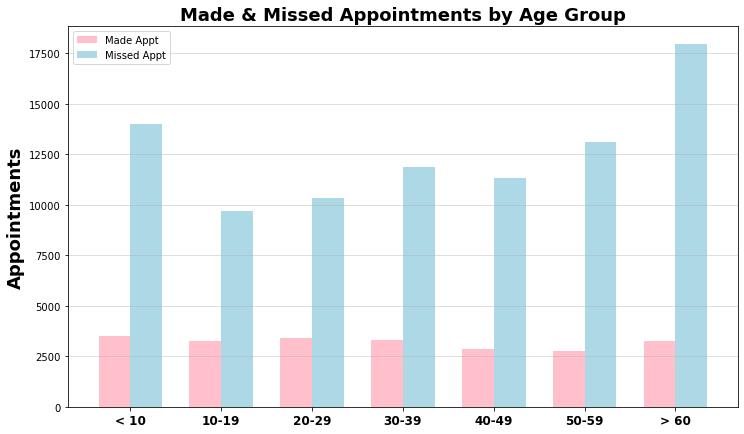

In [168]:
# bar chart
labels = keys
x = np.arange(len(labels)) # This returns array evenly spaced values 
width = 0.35 # Width of bars

fig, ax = plt.subplots()
ax.bar(x - width/2, yes_y_axis,width,label="Made Appt",color='pink')
ax.bar(x + width/2, no_y_axis, width,label="Missed Appt",color = (.68, .85, .90)) 

ax.set_ylabel("Appointments",fontsize=18,fontweight='bold')
ax.set_title("Made & Missed Appointments by Age Group",fontsize=18,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,fontweight='bold')
ax.legend()
fig.set_size_inches(12,7)
ax.grid(axis='y',alpha=0.5)
plt.show()

<a id="mun"></a>
## Municipalities of Brazil

After a detailed analysis of `'appt_location'` all of the neighborhoods/municipalities are within `one` of the 27 states (State of Espirito Santo, Brazil). Finding economic information at that level of detail is difficult. The time spent might not be worth the potential returns.  Additional review can be completed if there seems to be a trend in the data indicating appointment location will provide insight into predicting if a patient will or will not attend a scheduled appointment. 

**Wikipedia.org**
1. Provides list of 27 states and all municipalities 
https://en.wikipedia.org/wiki/Municipalities_of_Brazil

**GDP per Capita (R, 2012) by State**
1. https://www.worldatlas.com/articles/the-richest-and-poorest-states-of-brazil.html

<a id="sms"></a>
## SMS Messages Sent 

Of the `110,527 appointments` a text message was `sent 35,482 times`. There was a total of 74,045 patients that did not receive a text message.  The total number of appointments `MADE was 22,319` which is only **13,163** less (35,482 - 22,319). The next step will be to filter the data and understand how many messages sent resulted in the appointment being made.

In [169]:
sent = df[df['sms_sent']== 1].count()['sms_sent']
not_sent = df[df['sms_sent']== 0].count()['sms_sent']
print(f"Sent >> \t{sent}\nNot Sent >> \t{not_sent}\nTotal >> \t{sent+not_sent}")

Sent >> 	35482
Not Sent >> 	75045
Total >> 	110527


In [170]:
df_sent = df.query('sms_sent == 1')
df_sent_made = df_sent[df_sent['made_appt_yes=1_no=0'] == 1]
made_plus_sms = df_sent_made['made_appt_yes=1_no=0'].sum()
print(f"Number of appointments made when a message was sent: >> {made_plus_sms}")
print(f"That is a percentage of: {round(made_plus_sms/sent*100,2)}")

Number of appointments made when a message was sent: >> 9784
That is a percentage of: 27.57


## Sending a Text Message 
Sending a text message resulted in `27.57%` of the **appointments being made**. However, we do not know what percentage of those people would have made the appointment regardless of receiving a message. Ideally, we would need to conduct a trial of similar sample size where `everyone received a text message`.  If the percentage of missed appointments drops then it is more likely a result of the text messages being sent. 

<a id="appt_sch"></a>
## Appointments Scheduled by Patient ID 
Next, lets take a look at the number of appointments each individual made for this data set.  We can then determine of the total number of appointments made how many did that patient actually make.  First, create a new column called `df_appt` that will have two columns: `patient_id` and `made_appt_yes=1_no=0'`. Then by grouping on 'patient_id' this will allow for quick addition of three new columns:

1. **num_appts_scheduled** There are 44 unique values for this grouping with a minimum of 1 and a maximum of 88.
2. **num_appts_made** The number of appointments attended by the patient. e.g., scheduled 88 attended/made 1
3. **appt_made_percent** This will be the percent of appointments attended by patient

In [171]:
#pd.set_option('display.max_rows',10000)
df_appt = df[['patient_id','made_appt_yes=1_no=0']]
# df_appt = df_appt.groupby('patient_id').agg({'made_appt_yes=1_no=0':['count',sum]})
df_appt = df_appt.groupby('patient_id',as_index=True).agg(
                num_appts_scheduled=pd.NamedAgg(column='made_appt_yes=1_no=0',aggfunc='count'),
                num_appts_made=pd.NamedAgg(column='made_appt_yes=1_no=0',aggfunc=sum))
df_appt['appt_made_percent'] = round(df_appt['num_appts_made'] / df_appt['num_appts_scheduled']*100,0)
df_appt.query('appt_made_percent == 1.')

,num_appts_scheduled,num_appts_made,appt_made_percent
patient_id,,,
822145925426128,88,1,1.0


<a id="appt_sch_grp"></a>
## Number of Appointments Scheduled by Grouping
To explore a little deeper into the appointments scheduled a feature will be added to the main dataframe `df` called, **'appt_sched_grp'**. Each grouping will be assigned a value from 1 to 7, as described below. Then the correlation can be checked between this new feature and whether or not the appointment was attended/made.  

1. Patients that scheduled 1 appointment 
2. Patients that scheduled 2 appointment 
3. Patients that scheduled 3 appointment 
4. Patients that scheduled 4 appointment 
5. Patients that scheduled 5 appointment 
6. Patients that scheduled 6 to 10 appointments 
7. Patients that scheduled more than 10 appointments 

In [172]:
# List number of appointments scheduled 
a = list(df_appt['num_appts_scheduled'].unique())
a.sort()
print(a)
print(len(df_appt['num_appts_scheduled'].unique()))
#print(df_appt['num_appts_scheduled'].value_counts())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 29, 30, 33, 34, 35, 37, 38, 40, 42, 46, 50, 51, 54, 55, 57, 62, 65, 70, 84, 88]
44


In [173]:
# Add a column 'appt_sched_grp'

## Add Column 
appt_sched_grp_list = []
for i in range(len(df_appt['num_appts_scheduled'])):
    num_sched = df_appt.iloc[i,0]
    if num_sched == 1:
        appt_sched_grp_list.append(1)
    elif num_sched == 2:
        appt_sched_grp_list.append(2)
    elif num_sched == 3:
        appt_sched_grp_list.append(3)
    elif num_sched == 4:
        appt_sched_grp_list.append(4)
    elif num_sched == 5:
        appt_sched_grp_list.append(5)
    elif num_sched >= 6 and  num_sched <= 10:
        appt_sched_grp_list.append(6)
    elif num_sched > 10:
        appt_sched_grp_list.append(7)
    else:
        print(f"num_sched is >>> {num_sched}")
        
        
# Convert the df_appt index to a list. This is proper order 
# of patient_id values 
df_appt_index_list = list(df_appt.index)

# Validation check        
for i in range(10):
    print(f"{appt_sched_grp_list[i]} << >> {df_appt.iloc[i,0]}")

1 << >> 1
1 << >> 1
1 << >> 1
1 << >> 1
1 << >> 1
1 << >> 1
1 << >> 1
2 << >> 2
2 << >> 2
1 << >> 1


In [174]:
def convert_dict(list_1,list_2):
    '''Take two lists as arguments and convert them to a dictionary.
    list_1 will be the keys and list_2 will be the values
    **NOTE: Lists must be same length and index 0 to last index must be correct 
    key : value pairing'''
    converted_to_dict = dict(zip(list_1,list_2))
    return converted_to_dict

In [175]:
# Custom function covert lists to dict
appt_sched_grp_dict = convert_dict(df_appt_index_list,appt_sched_grp_list)

print("Confirm length of dictionary and list match:")
print(f"Length of df_appt_index_list >> {len(df_appt_index_list)}\n" 
      f"Length of appt_sched_grp_list >> {len(appt_sched_grp_list)}\n"
      f"Length of appt_sched_grp_dict >> {len(appt_sched_grp_dict)}")

Confirm length of dictionary and list match:
Length of df_appt_index_list >> 62299
Length of appt_sched_grp_list >> 62299
Length of appt_sched_grp_dict >> 62299


In [176]:
# Create and add column 'appt_sched_grp' to df
# Need to match patinet_id with correct grouping (use appt_sched_grp_dict)

for i in range(len(df['patient_id'])):
    p_id = df.loc[i,'patient_id']
    df.loc[i,'appt_sched_grp'] = appt_sched_grp_dict[p_id]
    #print(f"p_id = {p_id} <<>> Dict Value is: {appt_sched_grp_dict[p_id]}")

In [177]:
# Use to spot check new grouping is correct
#appt_sched_grp_dict[1711618823]


In [178]:
# Use to spot check in combination with above 
#df.query('patient_id == 1711618823')

In [179]:
print(df['appt_sched_grp'].min())

1.0


In [180]:
print(df['appt_sched_grp'].value_counts())
print(f"The median for percent made: {df['appt_sched_grp'].median()}")
print(f"The mean for percent made: {df['appt_sched_grp'].mean()}")

1.0    37920
2.0    27790
3.0    16500
4.0     9468
6.0     8862
5.0     5595
7.0     4392
Name: appt_sched_grp, dtype: int64
The median for percent made: 2.0
The mean for percent made: 2.6487916979561557


<a id="appt_sch_anal"></a>
## Analysis of Appointment Scheduled Grouping 
The column **'appt_sched_grp'** was added and plotted on the below histogram. The long right tail with a `mean > median` indicates the data is skewed right (positively skewed). The more appointments scheduled the lower the frequency.  Out of 105k samples about 40k of the patients only scheduled 1 appointment and the mean for this sample was 2.5 indicating that an average of 2 visits per patient. 

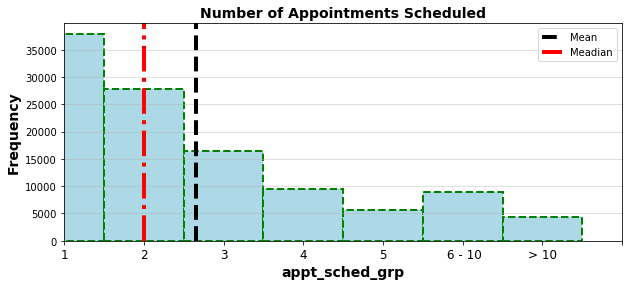

In [181]:
####
InteractiveShell.ast_node_interactivity = "none" # "last_expr" "all" "none"
fig, ax = plt.subplots(figsize=(10,4))
col_name = 'appt_sched_grp'
title = 'Number of Appointments Scheduled'
labels = ['1', '2', '3', '4', '5', ' 6 - 10', '> 10']
bins = np.arange(8) +0.5

plt.hist(df[col_name],facecolor=(.68, .85, .90),edgecolor='green',
        linewidth=2,linestyle='--',bins=bins,align='mid')

ax.set_title(title,fontsize=14,fontweight='bold')
ax.set_ylabel('Frequency',fontsize=14,fontweight='bold')
ax.set_xlabel(col_name,fontsize=14,fontweight='bold')
ax.set_xticklabels(labels,fontsize=12,horizontalalignment='center')

plt.axvline(df[col_name].mean(),color='k',linestyle='--',lw=4,label='Mean') # Mean
plt.axvline(df[col_name].median(),color='r',linestyle='-.',lw=4,label='Meadian') # Meadian 
plt.xlim([1,8])
plt.grid(axis='y',alpha=0.5)
plt.legend()
plt.show()
#https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram

In [182]:
print(df.columns)

Index(['patient_id', 'appt_id', 'appt_day', 'appt_made', 'age',
       'appt_location', 'financial_aid', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_sent', 'gender_f=1_m=0',
       'made_appt_yes=1_no=0', 'age_grouped', 'appt_sched_grp'],
      dtype='object')


## Percentage & Count for Made & Missed by Appointment Grouping
For this analysis we used the number of appointments, by grouping, and counted the number of `Made Appointments` and `Missed Appointments`. Then converted to a percentage for each grouping. The patients that scheduled **6 to 10 appointments** had the **highest** percentage of made appointments while those that schedule *more than 10* had the **lowest**. Overall, the number of appointments made by patient is `not a strong indicator` on whether or not the patient will make the appointment.    

In [183]:
# For each grouping 1 - 7 ('appt_sched_grp') count the number of mades (1) and misses (0)
# Convert each count to a percent based on grouping total
made_1, made_2, made_3, made_4, made_5, made_6, made_7 = 0,0,0,0,0,0,0
missed_1, missed_2, missed_3, missed_4, missed_5, missed_6, missed_7 = 0,0,0,0,0,0,0

for i in range(len(df['appt_sched_grp'])):
    
    num_sched = df.loc[i,'appt_sched_grp']
    yes1_no0 = df.loc[i,'made_appt_yes=1_no=0']
    
    if yes1_no0 == 1:
        if num_sched == 1:
            made_1 += 1
        elif num_sched == 2:
            made_2 += 1
        elif num_sched == 3:
            made_3 += 1
        elif num_sched == 4:
            made_4 += 1
        elif num_sched == 5:
            made_5 += 1
        elif num_sched == 6:
            made_6 += 1
        elif num_sched == 7:
            made_7 += 1
        else:
            print(f"num_sched is >>> {num_sched}")
            
    if yes1_no0 == 0:
        if num_sched == 1:
            missed_1 += 1
        elif num_sched == 2:
            missed_2 += 1
        elif num_sched == 3:
            missed_3 += 1
        elif num_sched == 4:
            missed_4 += 1
        elif num_sched == 5:
            missed_5 += 1
        elif num_sched == 6:
            missed_6 += 1
        elif num_sched == 7:
            missed_7 += 1
        else:
            print(f"num_sched is >>> {num_sched}")
            
made_count = np.array([made_1, made_2, made_3, made_4, made_5, made_6, made_7])
missed_count = np.array([missed_1, missed_2, missed_3, missed_4, missed_5, missed_6, missed_7])
sum_made_missed = made_count + missed_count
made_percent = made_count / sum_made_missed
missed_percent = missed_count / sum_made_missed
#print(missed_percent)
#print(sum_made_missed)
#print(sum(sum_made_missed))
print(f"Validate the count is correct should equal 110,527: {sum(made_count) + sum(missed_count)}")

Validate the count is correct should equal 110,527: 110527


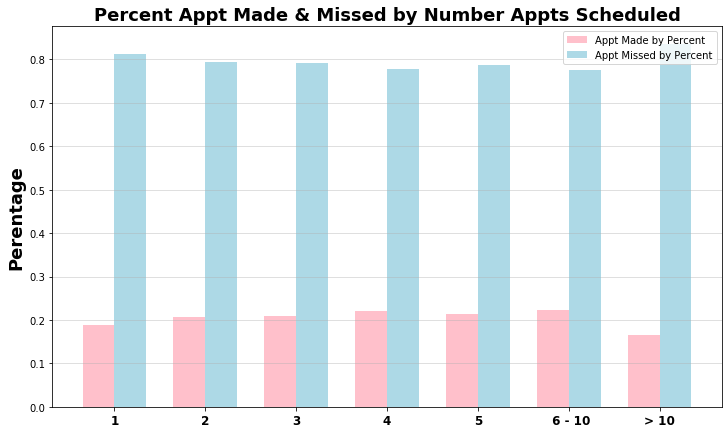

In [184]:
# bar chart for PERCENT
labels = ['1', '2', '3', '4', '5', ' 6 - 10', '> 10']
x = np.arange(len(labels)) # This returns array evenly spaced values 
width = 0.35 # Width of bars

fig, ax = plt.subplots()
ax.bar(x - width/2, made_percent,width,label="Appt Made by Percent",color='pink')
ax.bar(x + width/2, missed_percent, width,label="Appt Missed by Percent",color = (.68, .85, .90)) 

ax.set_ylabel("Perentage",fontsize=18,fontweight='bold')
ax.set_title("Percent Appt Made & Missed by Number Appts Scheduled",fontsize=18,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,fontweight='bold')
ax.legend()
fig.set_size_inches(12,7)
ax.grid(axis='y',alpha=0.5)
plt.show()

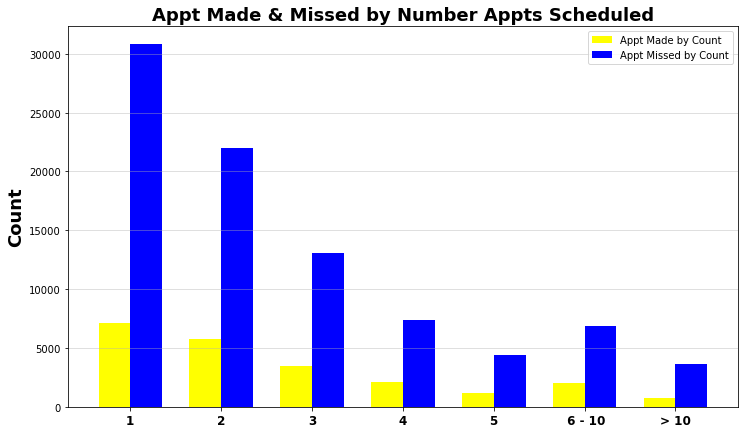

In [185]:
# bar chart for COUNT
labels = ['1', '2', '3', '4', '5', ' 6 - 10', '> 10']
#y_labels = [i for i in range(0,90000,2500)]
#print(y_labels)
x = np.arange(len(labels)) # This returns array evenly spaced values 
width = 0.35 # Width of bars

fig, ax = plt.subplots()
ax.bar(x - width/2, made_count,width,label="Appt Made by Count",color='yellow')
ax.bar(x + width/2, missed_count, width,label="Appt Missed by Count",color = 'blue') 

ax.set_ylabel("Count",fontsize=18,fontweight='bold')
ax.set_title("Appt Made & Missed by Number Appts Scheduled",fontsize=18,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,fontweight='bold')
#ax.set_yticklabels(y_labels,fontsize=12,fontweight='bold')
ax.legend()
fig.set_size_inches(12,7)
ax.grid(axis='y',alpha=0.5)
plt.show()

<a id="appt_made"></a>
## Percentage of Appointments Attended/Made
Now we want to create another feature that will be added to the main `df`. This will be a another grouping assigned to a numerical value (1 - 5), described below. The new feature added will be called **appt_per_grp** which will be a grouping based on percentage of appointments attended/made. E.g., if patient_id scheduled 3 appointments and only attend 1 they would be assigned the value 3.      

1. Percentage Appointments Attended/Made: ' < 10 percent' 
2. Percentage Appointments Attended/Made: ' 10 >= and < 25 percent'
3. Percentage Appointments Attended/Made: ' 25 >= and < 50 percent' 
4. Percentage Appointments Attended/Made: ' 50 >= and < 75 percent'
5. Percentage Appointments Attended/Made: ' > 75 percent'

In [186]:
# List of percent appoitments attended/made
b = list(df_appt['appt_made_percent'].unique())
b.sort()
print(b)
print(len(df_appt['appt_made_percent'].unique()))
#print(df_appt['appt_made_percent'].value_counts())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 27.0, 29.0, 30.0, 31.0, 33.0, 36.0, 38.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 50.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 60.0, 61.0, 62.0, 64.0, 67.0, 70.0, 71.0, 73.0, 75.0, 78.0, 80.0, 82.0, 83.0, 86.0, 88.0, 89.0, 92.0, 100.0]
65


In [187]:
df_appt.head(1)

In [188]:
# Add a column 'appt_made_percent'
appt_made_grp_list = []
for i in range(len(df_appt['appt_made_percent'])):
    num = df_appt.iloc[i,2]
    if num < 10.0:
        appt_made_grp_list.append(1)
    elif num >= 10.0 and num < 25.0:
        appt_made_grp_list.append(2)
    elif num >= 25.0 and num < 50.0:
        appt_made_grp_list.append(3)
    elif num >= 50.0 and num < 75.0:
        appt_made_grp_list.append(4)
    elif num >= 75.0 and num <= 100.0:
        appt_made_grp_list.append(5)
    else:
        print(f"num_sched is >>> {num}")
        
        
# Convert the df_appt index to a list. This is proper order 
# of patient_id values 
df_appt_index_list = list(df_appt.index)

# Validation check        
for i in range(5):
    print(f"{appt_made_grp_list[i]} << >> {df_appt.iloc[i,2]}")

1 << >> 0.0
1 << >> 0.0
1 << >> 0.0
1 << >> 0.0
1 << >> 0.0


In [189]:
# Create the dictionary used to popualte the main df
appt_made_grp_dict = convert_dict(df_appt_index_list,appt_made_grp_list)

print("Confirm length of dictionary and list match:")
print(f"Length of df_appt_index_list >> {len(df_appt_index_list)}\n" 
      f"Length of appt_made_grp_list >> {len(appt_made_grp_list)}\n"
      f"Length of appt_made_grp_dict >> {len(appt_made_grp_dict)}")

Confirm length of dictionary and list match:
Length of df_appt_index_list >> 62299
Length of appt_made_grp_list >> 62299
Length of appt_made_grp_dict >> 62299


In [190]:
# Create and add column 'appt_per_grp' to df
# Need to match patinet_id with correct grouping (use appt_sched_grp_dict)

for i in range(len(df['patient_id'])):
    p_id = df.loc[i,'patient_id']
    df.loc[i,'appt_per_grp'] = appt_made_grp_dict[p_id]

In [191]:
# Check and confirm everything is correct
# print(appt_made_grp_dict[29872499824296])
# df.query('patient_id == 29872499824296')

In [192]:
print(df['appt_per_grp'].value_counts())
print(f"The median for percent made: {df['appt_per_grp'].median()}")
print(f"The mean for percent made: {df['appt_per_grp'].mean()}")

1.0    68845
4.0    13352
3.0    12487
5.0    10418
2.0     5425
Name: appt_per_grp, dtype: int64
The median for percent made: 1.0
The mean for percent made: 2.014476100862233


<a id="analysis_appt_made"></a>
## Analysis Percentage of Appointments Attended/Made
We already know that based on appointments made only 20% of them are attended. Thus, it is not a surprise to see from the below histogram that 70,000 of the appointments fall into the less than 10% grouping. Instead of exploring that section in more detail it would probably be better investigate the groupings where 50 to 75 percent and 75 to 100% of the appointments have been attended when scheduled. 

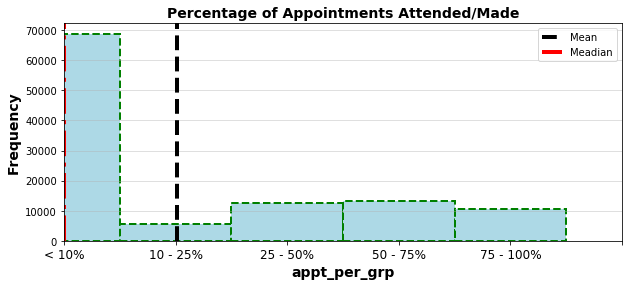

In [193]:
# Histogram Percentage Appt Made/Missed
InteractiveShell.ast_node_interactivity = "none" # "last_expr" "all" "none"
fig, ax = plt.subplots(figsize=(10,4))
col_name = 'appt_per_grp'
title = 'Percentage of Appointments Attended/Made'
labels = ['< 10%', '10 - 25%', '25 - 50%', '50 - 75%', '75 - 100%']
bins = np.arange(6) + 0.5

plt.hist(df[col_name],facecolor=(.68, .85, .90),edgecolor='green',
        linewidth=2,linestyle='--',bins=bins)

ax.set_title(title,fontsize=14,fontweight='bold')
ax.set_ylabel('Frequency',fontsize=14,fontweight='bold')
ax.set_xlabel(col_name,fontsize=14,fontweight='bold')
ax.set_xticklabels(labels,fontsize=12)

plt.axvline(df[col_name].mean(),color='k',linestyle='--',lw=4,label='Mean') # Mean
plt.axvline(df[col_name].median(),color='r',linestyle='-.',lw=4,label='Meadian') # Meadian 
#plt.xlim(1,5)
plt.grid(axis='y',alpha=0.5)
plt.xlim([1,6])
plt.legend()
plt.show()

In [194]:
pd.set_option('display.max_rows',500)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df.head()

<a id="add_ana_sched"></a>
## Additional Analysis Appointments Scheduled Grouping
Additional analysis of the appointments scheduled did not uncover anything significant. The initial thought was patients who scheduled `more appointments` might have higher attendance rate. However, that is not the case and when adding in other features (SMS, Financial Aid, Hypertension, Alcoholism and Handicap) there is `not` a strong correlation indicating that a patient might miss an appointment. Grouping 7 (> 10 appointments) had a few outliers:

1. Text messaging received was around 30% but only 17.5% for more than 10 appointments
2. Alcoholism was 13.5% for those with more than 10 appointments compared with others around 2.2 to 4.0%

In [195]:
# Use groupby on appt_sched_grp
df_1 = df.groupby('appt_sched_grp',as_index=True).agg(
            count=pd.NamedAgg(column='appt_sched_grp',aggfunc='count'),
            mean_percent_made=pd.NamedAgg(column='appt_per_grp',aggfunc='mean'),
            mean_age=pd.NamedAgg(column='age',aggfunc='mean'),
            count_sms_sent=pd.NamedAgg(column='sms_sent',aggfunc='sum'),
            count_fin_aid=pd.NamedAgg(column='financial_aid',aggfunc='sum'),
            count_hypertension=pd.NamedAgg(column='hypertension',aggfunc='sum'),
            count_alcoholism=pd.NamedAgg(column='alcoholism',aggfunc='sum'),
            count_handicap=pd.NamedAgg(column='handicap',aggfunc='sum'))

In [196]:
# Add percentage columns for sms, fin aid, hyper, alcohol and handicap
df_2 = df_1.copy()
df_2['percent_sms_sent'] = df_1['count_sms_sent'] / df_1['count'] *100
df_2['percent_fin_aid'] = df_1['count_fin_aid'] / df_1['count'] *100
df_2['percent_hypertension'] = df_1['count_hypertension'] / df_1['count'] *100
df_2['percent_alcoholism'] = df_1['count_alcoholism'] / df_1['count'] *100
df_2['percent_handicap'] = df_1['count_handicap'] / df_1['count'] *100
df_2.drop(columns=['count_sms_sent','count_fin_aid','count_hypertension','count_alcoholism','count_handicap'],inplace=True)
df_2

,count,mean_percent_made,mean_age,percent_sms_sent,percent_fin_aid,percent_hypertension,percent_alcoholism,percent_handicap
appt_sched_grp,,,,,,,,
1.0,37920,1.750844,36.784415,33.517932,8.723629,19.717827,2.231013,1.914557
2.0,27790,2.121339,36.286038,32.572868,9.686938,19.431450,2.511695,2.007917
3.0,16500,2.087818,36.341030,32.345455,10.436364,19.454545,2.600000,2.000000
4.0,9468,2.432193,36.693283,32.150401,11.111111,19.264892,2.619349,2.239121
5.0,5595,2.058088,37.853441,33.172475,11.170688,20.017873,3.485255,3.038427
6.0,8862,2.290115,39.226585,30.557436,11.205146,20.954638,3.904311,3.283683
7.0,4392,1.826730,43.172814,17.645719,10.678506,20.787796,13.615665,3.916211


<a id="gender"></a>
## Gender Analysis 
Exploring the relationship between gender and appointments it was found that females accounted for a greater amount of total appointments (about 80/20 split). Additionally, both genders are equally likely to make their respected appointments.  Females `attended 20.31 percent` and `males attended 19.97 percent` of their respected appointments. 

In [197]:
InteractiveShell.ast_node_interactivity = "last_expr" # "last_expr" "all" "none"

In [198]:
# Data crunch for gender analysis 
total_count_f = df[df['gender_f=1_m=0'] == 1].count()
total_count_m = df[df['gender_f=1_m=0'] == 0].count()
count_f_made = (df['gender_f=1_m=0'] == 1) & (df['made_appt_yes=1_no=0'] == 1)
count_f_missed = (df['gender_f=1_m=0'] == 1) & (df['made_appt_yes=1_no=0'] == 0)
count_m_made = (df['gender_f=1_m=0'] == 0) & (df['made_appt_yes=1_no=0'] == 1)
count_m_missed = (df['gender_f=1_m=0'] == 0) & (df['made_appt_yes=1_no=0'] == 0)
f_made = count_f_made.sum()
f_missed = count_f_missed.sum()
m_made = count_m_made.sum()
m_missed = count_m_missed.sum()
# print(f_made)
# print(f_missed)
# print(m_made)
# print(m_missed)
#print(f_made + f_missed + m_made + m_missed)
print(f"Females attended {round(f_made / (f_made+f_missed)*100,2)} percent of appointments.")
print(f"Males attended {round(m_made / (m_made+m_missed)*100,2)} percent of appointments.")

Females attended 20.31 percent of appointments.
Males attended 19.97 percent of appointments.


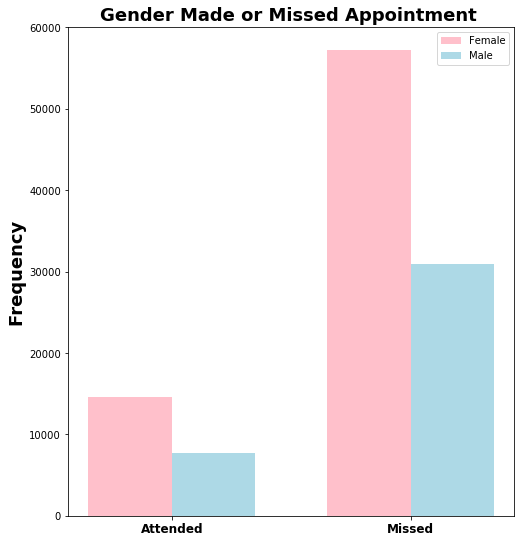

In [199]:
#####
female = [f_made,f_missed]
male = [m_made,m_missed]

labels = ['Attended', 'Missed']

x = np.arange(len(labels)) # This returns array evenly spaced values 
width = 0.35 # Width of bars

fig, ax = plt.subplots()
f = ax.bar(x - width/2, female,width,label="Female",color='pink')
m = ax.bar(x + width/2, male, width,label="Male",color = (.68, .85, .90)) 

ax.set_ylabel("Frequency",fontsize=18,fontweight='bold')
ax.set_title("Gender Made or Missed Appointment ",fontsize=18,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,fontweight='bold')

ax.legend()
fig.set_size_inches(8,9)
plt.show()

<a id="days"></a>
## Days between Appointment Day & Scheduled Day 
1. **appt_day** is the date the patient is scheduled to visit office
2. **appt_made** is the day the patient called to schedule the appointment

Add a column called `'days_between_appt'` where **0** indicates the patient made the appointment on same day and anything greater would be days between scheduled and actual. The maximum number of days (scheduled in advance is 179 days and the minimum is -6 days. There are 5 days with a negative value. Assuming this was an error or back filled information. For these days the appt_made will be adjusted to match the appt_day generating 0 difference.  

**Days Between Appointment Schedule and Actual Appointment Day**
For all patients that `made their scheduled appointment` the `mean` number of days between the day it was scheduled and actual day of appointment was `16 days`. For patents that did `NOT` make the scheduled appointment the mean number of days was `9`.  

In [200]:
# Remove the timestamp with dt.date (Note still dateime format)
df['appt_day'] = pd.to_datetime(df['appt_day']).dt.date
df['appt_made'] = pd.to_datetime(df['appt_made']).dt.date

In [201]:
# Add a column called 'days_between_appt'
df['days_between_appt'] = df['appt_made'] - df['appt_day']
df.head(1)

,patient_id,appt_id,appt_day,appt_made,age,appt_location,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,gender_f=1_m=0,made_appt_yes=1_no=0,age_grouped,appt_sched_grp,appt_per_grp,days_between_appt
0,29872499824296,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,7,2.0,1.0,0 days


In [202]:
# Min and Max days
print(f"Minimum number of days {df['days_between_appt'].min()}")
print(f"Maximum number of days {df['days_between_appt'].max()}")

Minimum number of days -6 days +00:00:00
Maximum number of days 179 days 00:00:00


In [203]:
# Five days with negative days
df_minus_days = df.query('days_between_appt < "0"')
df_minus_days

,patient_id,appt_id,appt_day,appt_made,age,appt_location,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,gender_f=1_m=0,made_appt_yes=1_no=0,age_grouped,appt_sched_grp,appt_per_grp,days_between_appt
27033,7839272661752,5679978,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,1,4,5.0,2.0,-1 days
55226,7896293967868,5715660,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,1,2,6.0,3.0,-1 days
64175,24252258389979,5664962,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,1,1,3,2.0,5.0,-1 days
71533,998231581612122,5686628,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,1,7,3.0,4.0,-6 days
72362,3787481966821,5655637,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,1,1,5.0,2.0,-1 days


In [204]:
# Change five dates 
df.iloc[27033,3] = df.iloc[27033,2]
df.iloc[55226,3] = df.iloc[55226,2]
df.iloc[64175,3] = df.iloc[64175,2]
df.iloc[71533,3] = df.iloc[71533,2]
df.iloc[72362,3] = df.iloc[72362,2]
df['days_between_appt'] = df['appt_made'] - df['appt_day']

In [205]:
# Check to confirm above fix worked (0 rows equls fixed)
df_minus_days = df.query('days_between_appt < "0"')
df_minus_days

,patient_id,appt_id,appt_day,appt_made,age,appt_location,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,gender_f=1_m=0,made_appt_yes=1_no=0,age_grouped,appt_sched_grp,appt_per_grp,days_between_appt


In [206]:
# Use datetime to convert day_between_appt to days an integer column data type
df['days_between_appt'] = df['days_between_appt'].dt.days.astype('int64')
df.head(2)

,patient_id,appt_id,appt_day,appt_made,age,appt_location,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,gender_f=1_m=0,made_appt_yes=1_no=0,age_grouped,appt_sched_grp,appt_per_grp,days_between_appt
0,29872499824296,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,7,2.0,1.0,0
1,558997776694438,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,6,2.0,1.0,0


In [207]:
# Get means for days between scheduling and actual appointment (missed and made)
InteractiveShell.ast_node_interactivity = "last_expr"
df_made1 = df[df['made_appt_yes=1_no=0'] == 1]
df_missed0 = df[df['made_appt_yes=1_no=0'] == 0]
df_made1.reset_index(inplace=True)
df_missed0.reset_index(inplace=True)
print(f"For appointments MADE: Mean days between scheduled & actual: {round(df_made1['days_between_appt'].mean(),2)}")
print(f"For appointments MADE: Mean days between cheduled & actual: {round(df_missed0['days_between_appt'].mean(),2)}")

For appointments MADE: Mean days between scheduled & actual: 15.83
For appointments MADE: Mean days between cheduled & actual: 8.75


## Histogram Days Between Scheduling and Actual Appointment Day 
Below is the histogram for days between appointment scheduled and actual appointment. The pink section represents all appointments missed with respect to total days between and the blue section is appointments made.  The 

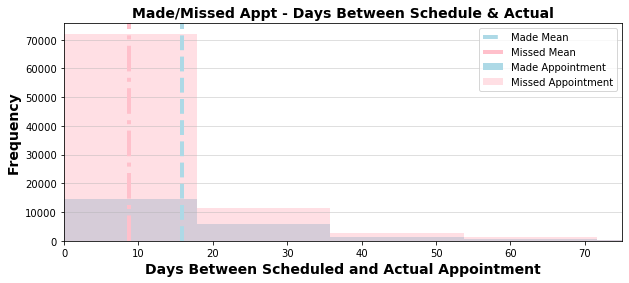

In [208]:
# Histogram Made and Missed Appointments by Days
made_series = df_made1['days_between_appt']
missed_series = df_missed0['days_between_appt']

plt.figure(figsize=(10,4))
plt.hist(made_series,label="Made Appointment",alpha=1,facecolor=(.68, .85, .90))
plt.hist(missed_series,label="Missed Appointment",alpha=0.5,facecolor='pink')

plt.title("Made/Missed Appt - Days Between Schedule & Actual",fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.xlabel("Days Between Scheduled and Actual Appointment",fontsize=14,fontweight='bold')

plt.axvline(made_series.mean(),color=(.68, .85, .90),linestyle='--',lw=4,label='Made Mean')
plt.axvline(missed_series.mean(),color='pink',linestyle='-.',lw=4,label='Missed Mean')

plt.grid(axis='y',alpha=0.5)
plt.legend(loc='best')
plt.xlim(0,75)
plt.show()

<a id="days_between"></a>
## Create New Feature 
Create a new column called `appt_days_between_grp` which will be an integer based on the following groupings: 

1. `<= 5`
2. 5  > & >= 10
3. `10 > & >= 15`
4. 15 > & >= 20
5. `20 > & >= 30`
6. 30 > & >= 40
7. `40 > & >= 50`
8. 50 > & >= 60
9. `> 60`

If the total days was greater than 20 but less than or equal to 30 then assign a value of 5...etc. 

In [209]:
## Add Column appt_days_between
made_group_list = []
lst = made_group_list
for i in range(len(df_made1['days_between_appt'])):
    days = df_made1.loc[i,'days_between_appt']

    if days <= 5:
        lst.append(1)
    elif days > 5 and days <= 10:
        lst.append(2)
    elif days > 10 and days <= 15:
        lst.append(3)
    elif days > 15 and days <= 20:
        lst.append(4)
    elif days > 20 and days <= 30:
        lst.append(5)
    elif days > 30 and days <= 40:
        lst.append(6)
    elif days > 40 and days <= 50:
        lst.append(7)       
    elif days > 50 and days <= 60:
        lst.append(8)
    else:
        lst.append(9)
        
made_group_list = lst

# Validation check        
# for i in range(25):
#     print(f"{made_group_list[i]} << >> {df_made1.loc[i,'days_between_appt']}")

In [210]:
# Add column new appt_days_between
df_made1['appt_days_between_grp'] = made_group_list
# Validate counts by new grouping
made = df_made1['appt_days_between_grp'].value_counts()
print(made)

1    7259
2    3860
5    3375
3    2616
6    1793
4    1784
7     683
9     596
8     353
Name: appt_days_between_grp, dtype: int64


c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [211]:
## Add Column appt_days_between
missed_group_list = []
lst = missed_group_list
for i in range(len(df_missed0['days_between_appt'])):
    days = df_missed0.loc[i,'days_between_appt']

    if days <= 5:
        lst.append(1)
    elif days > 5 and days <= 10:
        lst.append(2)
    elif days > 10 and days <= 15:
        lst.append(3)
    elif days > 15 and days <= 20:
        lst.append(4)
    elif days > 20 and days <= 30:
        lst.append(5)
    elif days > 30 and days <= 40:
        lst.append(6)
    elif days > 40 and days <= 50:
        lst.append(7)       
    elif days > 50 and days <= 60:
        lst.append(8)
    else:
        lst.append(9)
        
missed_group_list = lst

#Validation check        
# for i in range(25):
#     print(f"{missed_group_list[i]} << >> {df_missed0.loc[i,'days_between_appt']}")

In [212]:
# Add column new appt_days_between
df_missed0['appt_days_between_grp'] = missed_group_list
# Validate counts by new grouping
missed = df_missed0['appt_days_between_grp'].value_counts()
print(missed)

1    54551
2    10411
5     6983
3     5584
4     3726
6     3405
9     1499
7     1369
8      680
Name: appt_days_between_grp, dtype: int64


c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [213]:
# Create a list of grouping values for made & missed
made_val_list = list(made.index)
print(f"Made value list: {made_val_list}")
missed_val_list = list(missed.index)
print(f"Missed value list: {missed_val_list}")

# Create a list of counts for made & missed days between 
made_count_list = [made.iloc[i] for i in range(len(made_val_list))]
missed_count_list = [missed.iloc[i] for i in range(len(missed_val_list))]
print(f"The Made Count List: {made_count_list}")
print(f"The Missed Count List: {missed_count_list}")

Made value list: [1, 2, 5, 3, 6, 4, 7, 9, 8]
Missed value list: [1, 2, 5, 3, 4, 6, 9, 7, 8]
The Made Count List: [7259, 3860, 3375, 2616, 1793, 1784, 683, 596, 353]
The Missed Count List: [54551, 10411, 6983, 5584, 3726, 3405, 1499, 1369, 680]


In [214]:
# Create dictinaries for bar chart
made_dict = convert_dict(made_val_list,made_count_list)
missed_dict = convert_dict(missed_val_list,missed_count_list)
print(made_dict)
print(missed_dict)

{1: 7259, 2: 3860, 5: 3375, 3: 2616, 6: 1793, 4: 1784, 7: 683, 9: 596, 8: 353}
{1: 54551, 2: 10411, 5: 6983, 3: 5584, 4: 3726, 6: 3405, 9: 1499, 7: 1369, 8: 680}


In [215]:
# Create sum to calculate % and validate code
made_sum = sum(made_dict.values())
missed_sum = sum(missed_dict.values())
print(f"If correct sum hsould equal row count of 110,527 >> {made_sum + missed_sum}")
print(made_sum)
print(missed_sum)

If correct sum hsould equal row count of 110,527 >> 110527
22319
88208


In [216]:
# Create lists for chart (Need to be aligned 1 - 9)
made_list = []
missed_list = []
for i in range(1,10):
    made_list.append(round(made_dict[i] / made_sum*100,0)) 
    missed_list.append(round(missed_dict[i] / missed_sum*100,0)) 
print(made_list)
print(missed_list)

[33.0, 17.0, 12.0, 8.0, 15.0, 8.0, 3.0, 2.0, 3.0]
[62.0, 12.0, 6.0, 4.0, 8.0, 4.0, 2.0, 1.0, 2.0]


<a id="analysis_days_between"></a>
## Days between Scheduling and Actual Appointment 
Based on the analysis, thus far, we have seen that the mean value for days between is higher when the patient made the appointment (16 days). When the patient misses the appoint the mean is lower (9 days).  Does this imply the greater the number of days between will result in patients being more likely to make the appointment? To help answer that question the data was broken into two sections: 

**Made Appointments** and **Missed Appointments**
Next, we took the groupings, counted the values for each and divided by the total for respected grouping.  For example, there are 22,319 made appointments and 88,208 missed appointments. The patients that scheduled their appointment less than 5 days in advance totaled 7,259. That represented 33% of the total. While the patients that missed their appointments over 60% scheduled less than 5 days before appointment.  For all other groupings the percent made is higher.

Using the days between would be a good estimator for determining if the patient will make the appointment.  

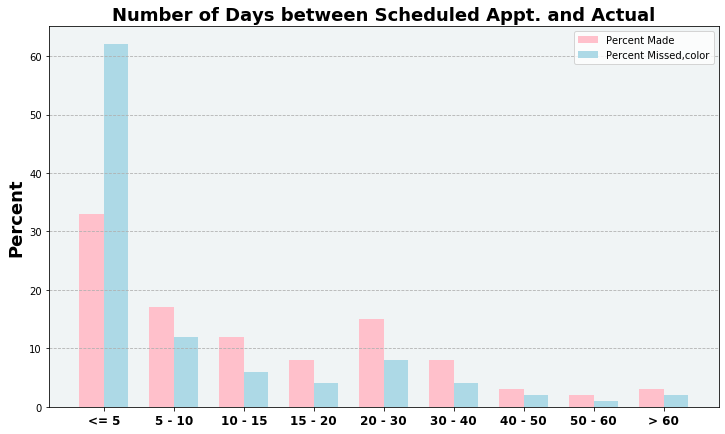

In [227]:
# Bar Chart days between scheduled and actual 
made = made_list
missed = missed_list

x_labels = ['<= 5','5 - 10','10 - 15','15 - 20','20 - 30',
             '30 - 40','40 - 50','50 - 60','> 60']

x = np.arange(len(x_labels)) # This returns array evenly spaced values 
width = 0.35 # Width of bars

fig, ax = plt.subplots()
fig.set_size_inches(12,7)
ax.bar(x - width/2, made,width,label="Percent Made",color='pink')
ax.bar(x + width/2, missed, width,label="Percent Missed,color",color= (.68, .85, .90)) 

ax.set_ylabel("Percent",fontsize=18,fontweight='bold')
ax.set_title("Number of Days between Scheduled Appt. and Actual",fontsize=18,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(x_labels,fontsize=12,fontweight='bold')

ax.set_facecolor('#F0F4F5')
ax.legend()
ax.grid(axis='y',alpha=1,linestyle='--')
plt.show()

In [218]:
# Run numbers for Conclusion and Recommendation section (Help keep clean)
import seaborn as sns
# Link to seaborn custom palette. Good article need to study
# http://jose-coto.com/styling-with-seaborn
df_corr_1 = df[['made_appt_yes=1_no=0','age','financial_aid',
               'hypertension','diabetes','alcoholism','handicap','sms_sent','gender_f=1_m=0']]

df_corr_2 = df[['made_appt_yes=1_no=0','age_grouped','appt_sched_grp',
                'appt_per_grp','days_between_appt']]

df_corr_3 = df[['made_appt_yes=1_no=0','appt_per_grp','age','financial_aid',
               'hypertension','diabetes','alcoholism','handicap','sms_sent',
                'gender_f=1_m=0']]


df_corr_1.head()

,made_appt_yes=1_no=0,age,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_sent,gender_f=1_m=0
0,0,62,0,1,0,0,0,0,1
1,0,56,0,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0,1
3,0,8,0,0,0,0,0,0,1
4,0,56,0,1,1,0,0,0,1


<a id="con_foc"></a>
## Concentrated Focus of Appointments Attended 
Based on the steep drop off and relative uniform spread in the histogram we should review the individual groupings to see if there is any particular trend in a particular feature. To do this we will group, by the column, `appt_per_grp` and take the mean of all other features. There are a total of `10` features that we will compare. Each plot will contain 5 features. 

1. `< 10%`   of meetings attended
2. `10-25%`  of meetings attended
3. `25-50%`  of meetings attended
4. `50-75%`  of meetings attended
5. `75-100%` of meetings attended

`*NOTE: True/False 1/0 columns are multiplied by 100*`

In [219]:
# Look at the mean of all features for percentage made 
df_percent_grp = df.groupby('appt_per_grp',as_index=True).agg(
                mean_age=pd.NamedAgg(column='age',aggfunc='mean'),
                mean_gender=pd.NamedAgg(column='gender_f=1_m=0',aggfunc='mean'),
                mean_appts_sched=pd.NamedAgg(column='appt_sched_grp',aggfunc='mean'),
                mean_days_between=pd.NamedAgg(column='days_between_appt',aggfunc='mean'),
                mean_sms=pd.NamedAgg(column='sms_sent',aggfunc='mean'),
                mean_fin_aid=pd.NamedAgg(column='financial_aid',aggfunc='mean'),
                mean_hyper=pd.NamedAgg(column='hypertension',aggfunc='mean'),
                mean_diab=pd.NamedAgg(column='diabetes',aggfunc='mean'),
                mean_aloch=pd.NamedAgg(column='alcoholism',aggfunc='mean'),
                mean_handicap=pd.NamedAgg(column='handicap',aggfunc='mean'))

df_percent_grp['mean_gender'] = round(df_percent_grp['mean_gender'] *100,0)
df_percent_grp['mean_sms'] = round(df_percent_grp['mean_sms'] *100,0)
df_percent_grp['mean_fin_aid'] = round(df_percent_grp['mean_fin_aid'] *100,0)
df_percent_grp['mean_hyper'] = round(df_percent_grp['mean_hyper'] *100,0)
df_percent_grp['mean_diab'] = round(df_percent_grp['mean_diab'] *100,0)
df_percent_grp['mean_aloch'] = round(df_percent_grp['mean_aloch'] *100,0)
df_percent_grp['mean_handicap'] = round(df_percent_grp['mean_handicap'] *100,0)
df_percent_grp

,mean_age,mean_gender,mean_appts_sched,mean_days_between,mean_sms,mean_fin_aid,mean_hyper,mean_diab,mean_aloch,mean_handicap
appt_per_grp,,,,,,,,,,
1.0,38.138950,64.0,2.213799,9.116523,29.0,9.0,21.0,7.0,3.0,2.0
2.0,40.257512,67.0,5.853272,6.941935,31.0,10.0,24.0,9.0,3.0,3.0
3.0,36.522784,68.0,4.225274,9.423240,34.0,11.0,20.0,8.0,3.0,2.0
4.0,33.955437,67.0,2.856052,11.633089,37.0,12.0,17.0,6.0,3.0,2.0
5.0,33.194279,63.0,1.699462,17.978883,43.0,11.0,15.0,6.0,3.0,2.0


In [220]:
col_names = list(df_percent_grp.columns)
print(col_names)

['mean_age', 'mean_gender', 'mean_appts_sched', 'mean_days_between', 'mean_sms', 'mean_fin_aid', 'mean_hyper', 'mean_diab', 'mean_aloch', 'mean_handicap']


## Age, Gender, Appointments Scheduled, Days between Appointments & SMS Sent
* **Age:** Age has a slight decline moving from low to high attendance. The mean age is lower as the percentage of appointment attended increases. 
* **Gender:** Gender has a standard normal distribution and does not appear to be a good indicator. 
* **Appointments Scheduled:** The number of appointments scheduled, by patient, is somewhat uniform and is not a strong indicator.
* **Days between Appointment:** The greater the number of days between appointment scheduled and day of appointment is a `good indicator` to predicting if the patient will make the meeting. The days are as follows: 9.11, 6.94, 9.42, 11.63 and 17.98 by grouping. The second grouping drops slightly but then trends up as attendance increases. 
    1. `< 10%`   of meetings attended Mean Days: `9.11`
    2. `10-25%`  of meetings attended Mean Days: `6.94`
    3. `25-50%`  of meetings attended Mean Days: `9.42`
    4. `50-75%`  of meetings attended Mean Days: `11.63`
    5. `75-100%` of meetings attended Mean Days: `17.98`
* **SMS Sent:** Sending a text message has an upward trend indicating that if a message is sent the patient will be more likely to make a higher percentage of their appointments. 

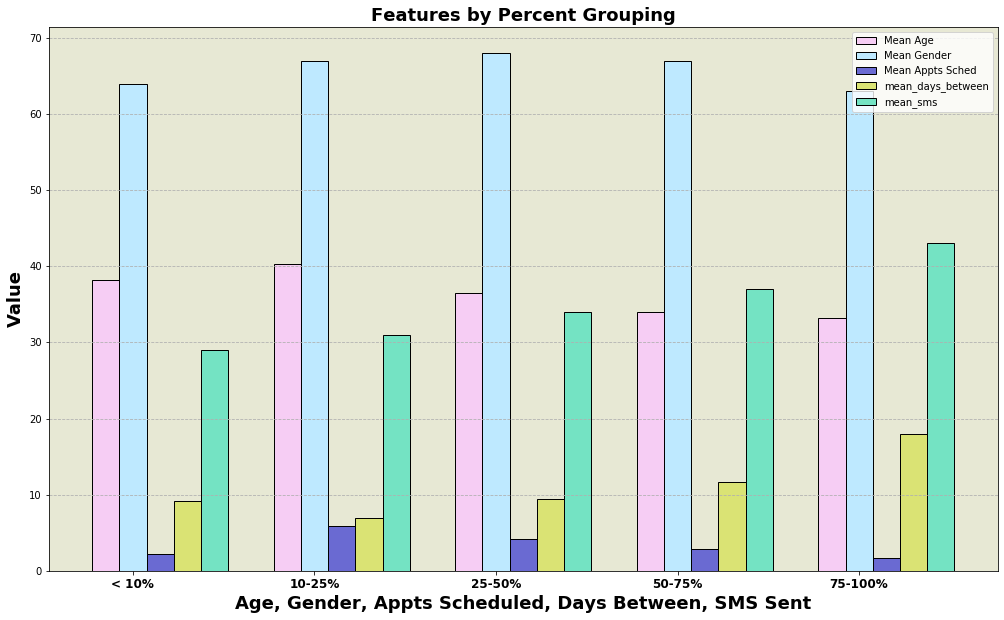

In [221]:
# bar chart for PERCENT group1
fig, ax = plt.subplots()
labels = ['< 10%', '10-25%', '25-50%', '50-75%', '75-100%']
bar1, bar2, bar3  = df_percent_grp['mean_age'], df_percent_grp['mean_gender'], df_percent_grp['mean_appts_sched']
bar4, bar5 = df_percent_grp['mean_days_between'], df_percent_grp['mean_sms']

label1, label2, label3 = "Mean Age", "Mean Gender", "Mean Appts Sched"
label4, label5 = "mean_days_between", "mean_sms"

bar_width = 0.15
# Set position of bar labels 
x1 = np.arange(len(labels)) # This returns array evenly spaced values
x2 = [i + bar_width for i in x1]
x3 = [i + bar_width for i in x2]
x4 = [i + bar_width for i in x3]
x5 = [i + bar_width for i in x4]

ax.bar(x1, bar1, bar_width,label=label1, edgecolor='black', color='#F6CDF4')
ax.bar(x2, bar2, bar_width,label=label2, edgecolor='black', color='#BEE9FF') 
ax.bar(x3, bar3, bar_width,label=label3, edgecolor='black', color='#6A6AD2')
ax.bar(x4, bar4, bar_width,label=label4, edgecolor='black', color='#DAE374')
ax.bar(x5, bar5, bar_width,label=label5, edgecolor='black', color='#74E3C3')

ax.set_title("Features by Percent Grouping",fontsize=18,fontweight='bold')
ax.set_ylabel("Value",fontsize=18,fontweight='bold')
#ax.set_yticklabels(fontsize=12,fontweight='bold')

ax.set_xticks([x + bar_width for x in range(len(labels))])
ax.set_xticklabels(labels,fontsize=12,fontweight='bold',ha='center')
ax.set_xlabel('Age, Gender, Appts Scheduled, Days Between, SMS Sent',fontsize=18,fontweight='bold',ha='center')

ax.set_facecolor('#E7E8D4')
ax.legend()
ax.grid(axis='y',alpha=1,linestyle='--')

fig.set_size_inches(17,10)
plt.show()

## Hypertension, Diabetes, Alcoholism, Financial Aid & Handicap 
Of the remaining 5 features `Hypertension & Financial Aid` provide some insight into predicting if a patient will attend a higher percentage of their scheduled appointments. As the percentage of appointments made increases mean hypertension  decreases (less patients have) and mean financial aid increases.  

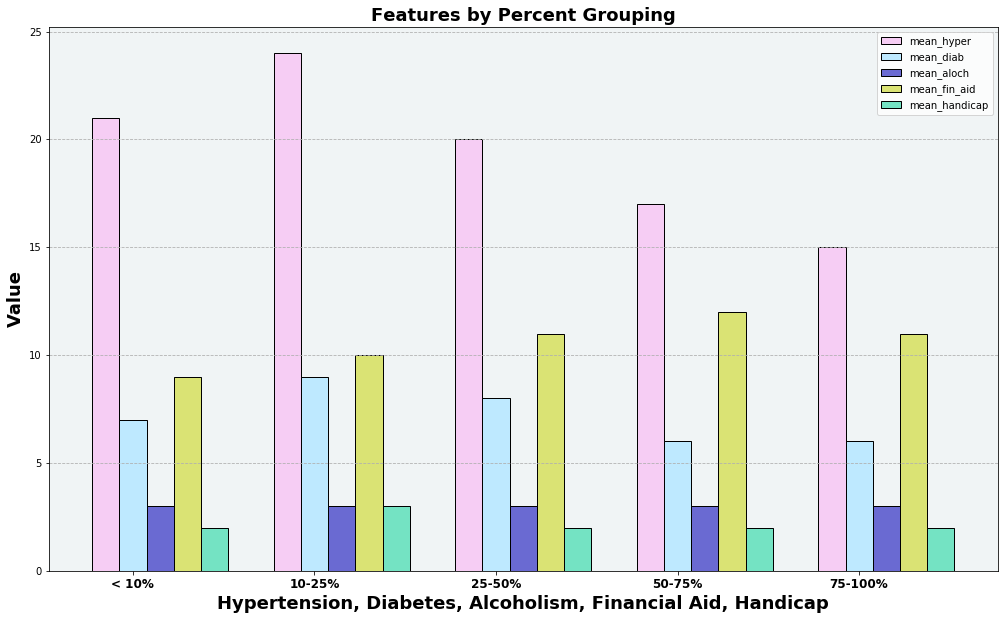

In [222]:
# bar chart for PERCENT group2
labels = ['< 10%', '10-25%', '25-50%', '50-75%', '75-100%']
bar1, bar2, bar3  = df_percent_grp['mean_hyper'], df_percent_grp['mean_diab'], df_percent_grp['mean_aloch']
bar4, bar5 = df_percent_grp['mean_fin_aid'], df_percent_grp['mean_handicap']

label1, label2, label3,label4, label5 = "mean_hyper", "mean_diab", "mean_aloch","mean_fin_aid","mean_handicap"

bar_width = 0.15
# Set position of bar labels 
x1 = np.arange(len(labels)) # This returns array evenly spaced values
x2 = [i + bar_width for i in x1]
x3 = [i + bar_width for i in x2]
x4 = [i + bar_width for i in x3]
x5 = [i + bar_width for i in x4]
#https://python-graph-gallery.com/11-grouped-barplot/


fig, ax = plt.subplots()
ax.bar(x1, bar1, bar_width,label=label1, edgecolor='black', color='#F6CDF4')
ax.bar(x2, bar2, bar_width,label=label2, edgecolor='black', color='#BEE9FF') 
ax.bar(x3, bar3, bar_width,label=label3, edgecolor='black', color='#6A6AD2')

ax.bar(x4, bar4, bar_width,label=label4, edgecolor='black', color='#DAE374')
ax.bar(x5, bar5, bar_width,label=label5, edgecolor='black', color='#74E3C3')

ax.set_title("Features by Percent Grouping",fontsize=18,fontweight='bold')
ax.set_ylabel("Value",fontsize=18,fontweight='bold')
#ax.set_yticklabels(fontsize=12,fontweight='bold')

ax.set_xticks([x + bar_width for x in range(len(labels))])
ax.set_xticklabels(labels,fontsize=12,fontweight='bold',ha='center')
ax.set_xlabel('Hypertension, Diabetes, Alcoholism, Financial Aid, Handicap',fontsize=18,fontweight='bold',ha='center')

ax.set_facecolor('#F0F4F5')
ax.legend()
ax.grid(axis='y',alpha=1,linestyle='--')

fig.set_size_inches(17,10)
plt.show()

<a id="con_rec"></a>
<a id="features"></a>
<div class="alert alert-block alert-info">
    <font size="+3"><b>Conclusion and Recommendation</b></font>
</div>

<a id="date_corr"></a>
## Heatmap Correlation Original Data 
We started the data analysis process looking to answers the question: ***Based on the data set provided would it be possible to predict whether a patient would attend the scheduled appointment or not attend***.  The initial analysis showed that **80%** of the appointments scheduled resulted in the patient **MISSING** the scheduled appointment. 

Starting with the given data points there was not a strong positive or negative correlation between the data.  The strongest correlation with respect to making or missing the scheduled appointment belonged to the feature `text messages sent` at **0.13**.  Then there was age, diabetes and hypertension that had a stronger correlation amongst themselves but was not useful with determining if a patient would attend the scheduled appointment. 

Note: Matplotlib version 3.1.1 top  & bottom heatmap cutoff issue being fixed with version 3.1.2

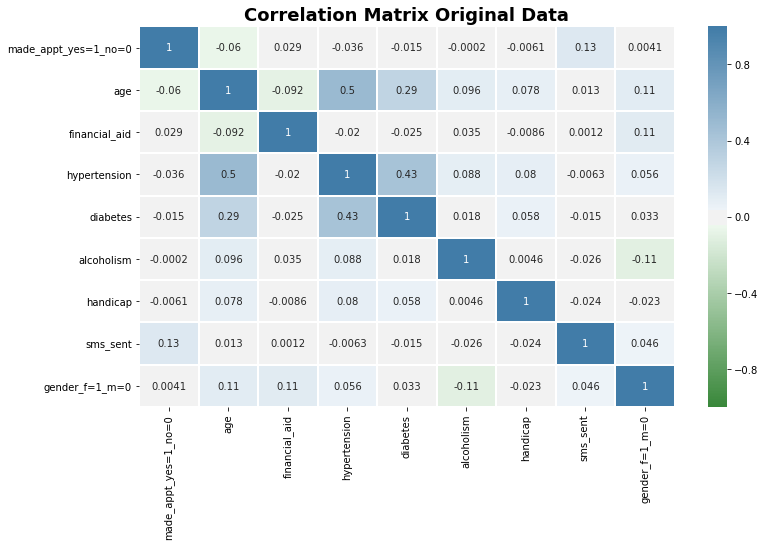

In [223]:
# Heatmap Original Data
InteractiveShell.ast_node_interactivity = "last_expr" # "last_expr" "all" "none"
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
ax.set_title("Correlation Matrix Original Data",fontsize=18,fontweight='bold')
ax = sns.heatmap(df_corr_1.corr(),vmin=-1,cmap=sns.diverging_palette(128,240,as_cmap=True),annot=True,linewidths=1)
# vmin=-1 Makes it easier to see neg and pos corr. Scale switches from 0 through 1 to 1 through -1

## Heatmap Correlation Engineered Features 
The Engineered Features provided some useful insight but did not provide robust results. First, we can review features added and their correlation score. 

1. `Age Grouped` - Grouping the individual patients age to see if a particular age group had a higher tendency of attending the scheduled appointment. Based on the 7 age grouping there was not a particular group made or missed appointments more than any other age grouping.  This is supported by the low correlation score (-0.061), too.

2. `Appointment Scheduled Group` The appointment scheduled group provided a look at all of the patients grouped by total number of appoints they had. The initial assumption was patients with more appointments scheduled would be less likely to miss an appointment.   However, that was not the scenario as number of appointments did not have a direct correlation to patients making or missing their appointment.  

3. `Appointment Percentage Group` - For this grouping we took all of the patients and calculated what percentage of **their meetings they attended**. The histogram (*Percentage of Appointments Attended/Made*) was skewed right but it was somewhat uniform after the initial bin of misses. This suggests that maybe this grouping will be valuable to predicting if patients will attend scheduled meetings. **Age**, **Text Messages Sent**, **Days between Appointment**, **Hypertension** and **Financial Aid** received all appear to be good indicators for deciding if a patient will make a higher percentage of scheduled meetings.  

4. `Number of Days between Scheduling Appointment and Actual Day of Appointment` The number of days combined with appointment percentage group provides a strong indicator for predicting attendance.  Days between appointment has a correlation of 0.19 with Made/Missed and 0.14 with percentage of appointments made.  

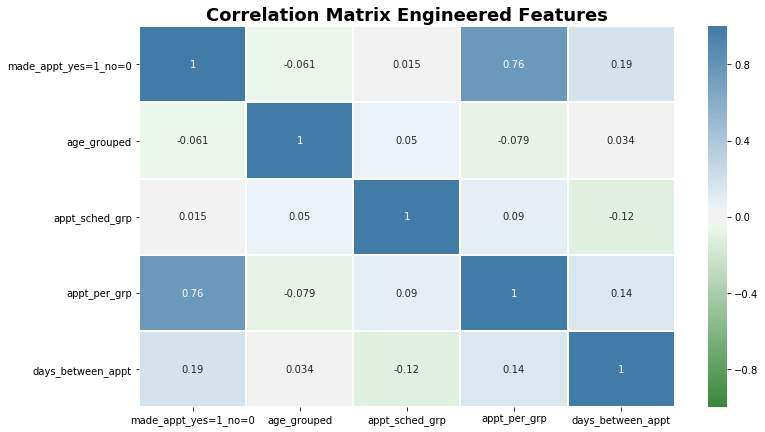

In [224]:
# Heatmap Original Data
InteractiveShell.ast_node_interactivity = "none" # "last_expr" "all" "none"
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
ax.set_title("Correlation Matrix Engineered Features",fontsize=18,fontweight='bold')
ax = sns.heatmap(df_corr_2.corr(),vmin=-1,cmap=sns.diverging_palette(128,240,as_cmap=True),annot=True,linewidths=1)


<a id="final"></a>
## Final Recommendation 
The final recommendation would be to create a machine learning model using Random Forest algorithm using all 10 features.  Then run again using the following features to see if the predictor value improves.  The below 6 indicator are what is believed to be the best features for predicting whether a patient will make or miss a scheduled appointment. 

 * Age, Hypertension, SMS Sent, Financial Aid, Days Between Grouping and Appointment Percentage Grouping

In [225]:
# Save final version of main df to csv
import datetime as dt
y_m_d = dt.datetime.today().strftime("%Y%m%d")
file_name = 'no_show_final_' + y_m_d + '.csv'
df.to_csv(file_name, index=False)

In [226]:
print(matplotlib.__version__)

3.1.2
